<a href="https://colab.research.google.com/github/primriq/ML-Apex-Univ/blob/main/knn_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## K-Nearest Neighbors (KNN) Classification with the Iris Dataset
In this notebook, we build a K-Nearest Neighbors (KNN) classifier using the classic Iris dataset. The objective is to predict the species of an iris flower based on its measured features.

The steps we will follow are:
1. Load the Iris dataset
2. Convert the data into a pandas DataFrame
3. Explore the features and target classes
4. Split the data into training and test sets
5. Train a KNN classifier
6. Evaluate the model using accuracy, confusion matrix, and classification report
7. Experiment with different values of k

### Importing libraries and loading the dataset
We start by importing pandas and scikit-learn utilities, and then load the built-in Iris dataset.

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

iris = load_iris()

### Understanding the Iris dataset
The Iris dataset contains measurements of iris flowers from three species:
- Setosa
- Versicolor
- Virginica

For each flower, we have four numerical features:
- Sepal length (cm)
- Sepal width (cm)
- Petal length (cm)
- Petal width (cm)

The target is the species label for each sample.

In [2]:
print('Feature names:', iris.feature_names)
print('Target names:', iris.target_names)
print('Data shape:', iris.data.shape)
print('Target shape:', iris.target.shape)

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']
Data shape: (150, 4)
Target shape: (150,)


### Creating a DataFrame
To make the data easier to inspect and manipulate, we convert the feature matrix into a pandas DataFrame and add the target labels as a separate column.

In [3]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


We can also add a column with the species names to make the table more readable.

In [4]:
df['species'] = df['target'].apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


It is often useful to look at a few samples from each class to get an idea of the feature values.

In [5]:
# Sample rows for each species
df[df.target == 0].head()  # Setosa

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [6]:
df[df.target == 1].head()  # Versicolor

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor


In [7]:
df[df.target == 2].head()  # Virginica

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
100,6.3,3.3,6.0,2.5,2,virginica
101,5.8,2.7,5.1,1.9,2,virginica
102,7.1,3.0,5.9,2.1,2,virginica
103,6.3,2.9,5.6,1.8,2,virginica
104,6.5,3.0,5.8,2.2,2,virginica


### Basic visualization
As a simple visualization, we can plot petal length versus petal width and color the points by species. This often shows that some classes are well separated in this feature space.

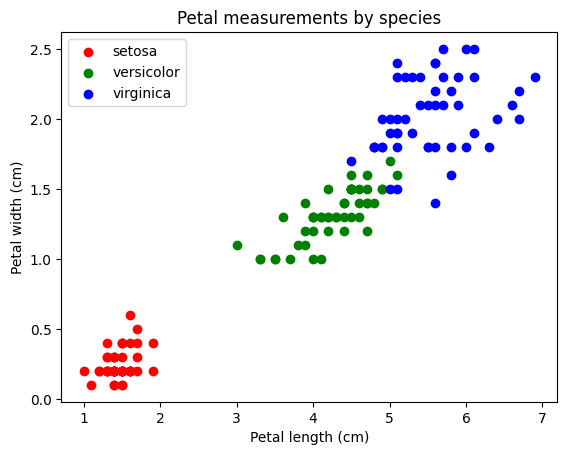

In [8]:
colors = ['red', 'green', 'blue']
for target_value, color in zip([0, 1, 2], colors):
    subset = df[df.target == target_value]
    plt.scatter(subset['petal length (cm)'], subset['petal width (cm)'],
                color=color, label=iris.target_names[target_value])
plt.xlabel('Petal length (cm)')
plt.ylabel('Petal width (cm)')
plt.legend()
plt.title('Petal measurements by species')
plt.show()

### Splitting the data into training and test sets
We now separate the features and target, and then split them into training and test sets. The model will be fitted on the training set and evaluated on the test set to estimate how well it generalizes.

In [9]:
X = df[iris.feature_names]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
X_train.shape, X_test.shape

((120, 4), (30, 4))

### Training a K-Nearest Neighbors classifier
KNN is a simple algorithm that classifies a new data point based on the majority label of its k nearest neighbors in the training set. Here, we start with `n_neighbors=3`. The model stores the training data and uses it during prediction.

In [10]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

### Evaluating the model using accuracy
Accuracy is the ratio of correctly predicted samples to the total number of samples in the test set.

In [11]:
test_accuracy = knn.score(X_test, y_test)
print('Test accuracy:', test_accuracy)

Test accuracy: 1.0


### Confusion matrix
A confusion matrix shows how many samples of each true class were predicted as each possible class. It provides more detail than a single accuracy value.

In [12]:
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

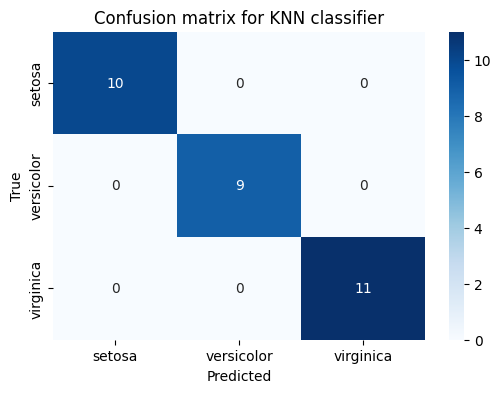

In [13]:
plt.figure(figsize=(6, 4))
sn.heatmap(cm, annot=True, fmt='d', cmap='Blues',
           xticklabels=iris.target_names,
           yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion matrix for KNN classifier')
plt.show()

### Classification report
The classification report summarizes precision, recall, and F1-score for each class.
- Precision: out of all predicted samples of a given class, how many were correct
- Recall: out of all actual samples of a given class, how many were correctly predicted
- F1-score: harmonic mean of precision and recall

In [14]:
print(classification_report(y_test, y_pred, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### Effect of different k values
The choice of `n_neighbors` (k) can have a noticeable impact on performance. We can try several values of k and compare the test accuracy for each.

In [15]:
for k in range(1, 11):
    model_k = KNeighborsClassifier(n_neighbors=k)
    model_k.fit(X_train, y_train)
    score = model_k.score(X_test, y_test)
    print(f'k = {k}, Test accuracy = {score}')

k = 1, Test accuracy = 1.0
k = 2, Test accuracy = 1.0
k = 3, Test accuracy = 1.0
k = 4, Test accuracy = 1.0
k = 5, Test accuracy = 1.0
k = 6, Test accuracy = 1.0
k = 7, Test accuracy = 0.9666666666666667
k = 8, Test accuracy = 1.0
k = 9, Test accuracy = 1.0
k = 10, Test accuracy = 1.0


### Summary
In this notebook, we used the K-Nearest Neighbors algorithm to classify iris flowers into species based on their measurements. We walked through loading and exploring the dataset, splitting the data into training and test sets, training a KNN model, evaluating it with accuracy and a confusion matrix, and viewing a detailed classification report. Finally, we examined how changing the value of k affects the performance of the classifier.